# Boston House prices dataset 

### Regresion multiple método Sequential Selector Backward


In [1]:
### Import 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno # To get visual representation of missing values

import math
import scipy.stats as stats
from scipy.stats import skew
import statsmodels.api as sm

import sklearn.compose 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import warnings
warnings.filterwarnings('ignore') # To ignore the warnings

In [2]:
%matplotlib inline
sns.set_style(style='whitegrid')
sns.set_context(context ='notebook')
plt.rcParams['figure.figsize'] = (11, 9.4)

### Import dataset from Sklearn

In [3]:
from sklearn.datasets import load_boston

In [4]:
boston = load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### Define ours variables
Let's define out target variable and our inputs 

In [5]:
X_inputs = pd.DataFrame(boston.data, columns=boston.feature_names)

X_inputs.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
y_target = pd.Series(boston.target, name='MEDV')

In [7]:
print(f'Shape of X_inputs: {X_inputs.shape}')
print(f'Shape of y_target: {y_target.shape}')

Shape of X_inputs: (506, 13)
Shape of y_target: (506,)


### Split data test and train

In [8]:
X, X_test, y, y_test = train_test_split(
    X_inputs,
    y_target,
    #test_size=0.25,
    random_state=1
)

In [9]:
df = pd.concat([X, y], axis=1)

In [10]:
X.shape

(379, 13)

In [11]:
X.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000
mean,3.805183,11.521108,11.220053,0.081794,0.554073,6.255726,68.751451,3.824433,9.525066,405.182058,18.478100,358.304802,12.936174
std,9.375846,23.492644,6.875362,0.274413,0.117825,0.687415,28.276504,2.138449,8.734550,169.483657,2.141433,89.601791,7.243381
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.083475,0.000000,5.255000,0.000000,0.447500,5.875000,45.050000,2.094450,4.000000,277.000000,17.400000,376.125000,7.165000
50%,0.245220,0.000000,9.690000,0.000000,0.538000,6.172000,79.200000,3.317500,5.000000,329.000000,19.100000,392.040000,11.970000
75%,3.683390,17.750000,18.100000,0.000000,0.624000,6.611000,94.050000,5.108550,24.000000,666.000000,20.200000,396.220000,17.135000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


### Fitting lineal model

In [12]:
lin_reg = LinearRegression()


### Variable selection with sequential future/backward selection

In [40]:
from mlxtend.feature_selection import SequentialFeatureSelector

sfs = SequentialFeatureSelector(
    lin_reg,
    k_features=6,
    forward=False,
    cv=10,
)

sfs = sfs.fit(X, y)
sfs

SequentialFeatureSelector(cv=10, estimator=LinearRegression(), forward=False,
                          k_features=(6, 6), scoring='r2')

In [37]:
# from sklearn.feature_selection import SequentialFeatureSelector

# sfs = SequentialFeatureSelector(
#     lin_reg,
#     #k_features=6,
#     n_features_to_select=6,
#     direction='backward',
#     cv=10
# )

# sfs = sfs.fit(X, y)
# sfs

In [43]:
#print(f'Best features: {X.columns[sfs.get_support()]}')
print(f'Best features: {sfs.subsets_}')

Best features: {13: {'feature_idx': (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12), 'cv_scores': array([0.62643795, 0.52473224, 0.81957826, 0.77156943, 0.6674731 ,
       0.75595946, 0.52406079, 0.69292566, 0.61254204, 0.7696535 ]), 'avg_score': 0.6764932429312003, 'feature_names': ('CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT')}, 12: {'feature_idx': (0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12), 'cv_scores': array([0.62489456, 0.52425459, 0.82727597, 0.77750284, 0.67234399,
       0.75643757, 0.52396634, 0.69245908, 0.61730567, 0.77510995]), 'avg_score': 0.6791550567043569, 'feature_names': ('CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT')}, 11: {'feature_idx': (0, 1, 3, 4, 5, 7, 8, 9, 10, 11, 12), 'cv_scores': array([0.63448971, 0.52346959, 0.82624872, 0.77788846, 0.67816588,
       0.76294532, 0.52333962, 0.69196244, 0.61822594, 0.77369138]), 'avg_score': 0.6810427062096446, 'feature_names': ('CRIM', 'Z

In [45]:
print(f'Best score: {sfs.k_feature_names_}')
print(f'Best score: {sfs.k_score_}')

Best score: ('ZN', 'NOX', 'RM', 'DIS', 'PTRATIO', 'LSTAT')
Best score: 0.6612705577552214


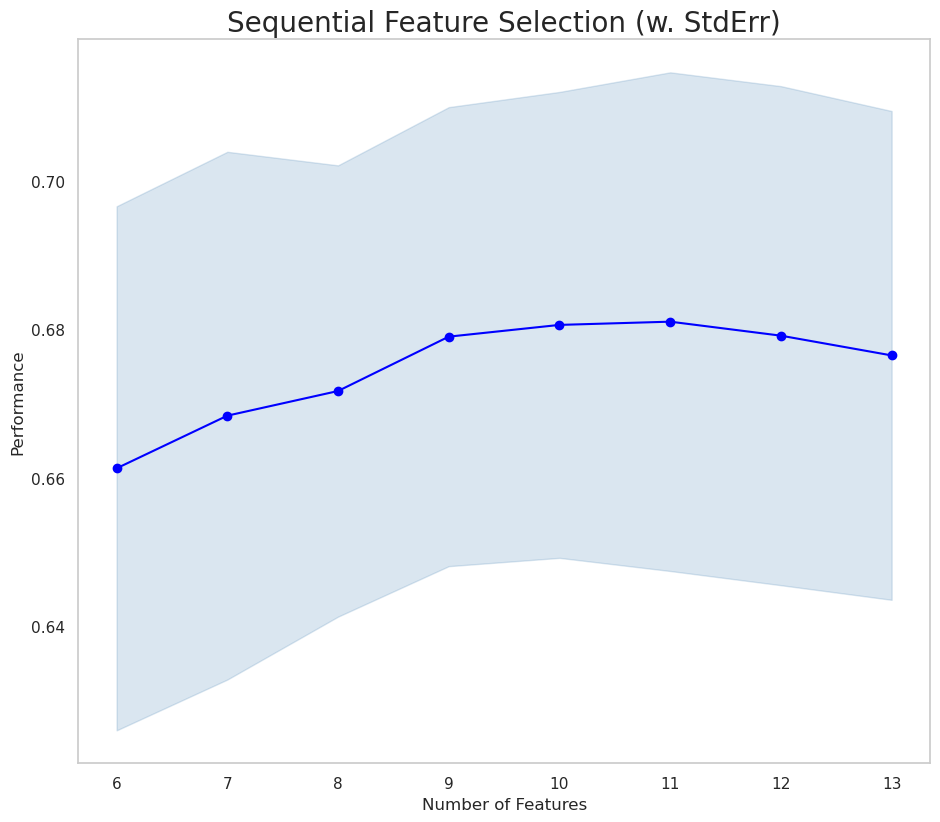

In [56]:
from mlxtend.plotting import plot_sequential_feature_selection as plt_sfs

fig = plt_sfs(sfs.get_metric_dict(), kind='std_err')

plt.title('Sequential Feature Selection (w. StdErr)', fontsize=20)
plt.grid()
plt.show()

In [70]:

X_1 = X[list(sfs.k_feature_names_)]
# X_train_sfs = sfs.transform(X)

# X_test_sfs = sfs.transform(X_test)

X_constant = sm.add_constant(X_1) 

lin_reg = sm.OLS(y, X_constant).fit()

lin_reg.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     138.0
Date:                Wed, 21 Aug 2024   Prob (F-statistic):           2.06e-91
Time:                        23:04:35   Log-Likelihood:                -1144.7
No. Observations:                 379   AIC:                             2303.
Df Residuals:                     372   BIC:                             2331.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         43.1178      5.318      8.108      0.000      32.660      53.575
ZN             0.0428      0.017      2.586      0.010       0.010       0.075
NOX          -18.6018      3.691     -5.040      0.000     -25.860     -11.344
RM             3.1579      0.491      6.430      0.000       2.192       4.124
DIS           -1.4148      0.228     -6.218      0.000      -1.862      -0.967
PTRATIO       -0.9506      0.139     -6.859      0.000      -1.223      -0.678
LSTAT         -0.5983      0.054    -10.990      0.000      -0.705      -0.491
==============================================================================
Omnibus:                      156.503   Durbin-Watson:                   1.907
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              785.961
Skew:                           1.712   Prob(JB):                    2.14e-171
Kurtosis:                       9.168   Cond. No.                         660.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [74]:
X_new = sm.add_constant(X_test[list(sfs.k_feature_names_)])

y_pred = lin_reg.predict(X_new)

print('Coefficient of determinacion: ')
print(f'R^2 test model_1: {r2_score(y_test, y_pred)}')

print('\nMean Squared Error: ')
print(f'MSE test model_1: {mean_squared_error(y_test, y_pred)}')

Coefficient of determinacion: 
R^2 test model_1: 0.7499871031870426

Mean Squared Error: 
MSE test model_1: 24.765895927842074
